In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import glob as glob
import os
import arviz as az

In [6]:
seed=np.arange(0,500,2)
frame_skip=4
dt_ckf=0.025
dt_control=0.1
N_radar=3
N_steps=1000
move_radars = ["no-move_radars","move_radars"]
remove_tmp_images = ["remove_tmp_images"]
save_images = ["no-save_images"]

In [7]:
def get_rmse_array(filepath):
    results_mv_radar = sorted(list(glob.iglob(filepath+"*/*rmse*")))

    rmse_array = []
    for rmse_file in results_mv_radar:
        rmse_array_i = np.genfromtxt(rmse_file,delimiter=",",skip_header=1)
        rmse_array.append(rmse_array_i)

    rmse_array = np.stack(rmse_array)

    k = rmse_array[:,:,0].mean(axis=0)
    rmse = rmse_array[:,:,1]
    
    return k,rmse

In [8]:
experiment_name = os.path.join("Experiment1_SFIM",f"N_radar={N_radar}-{move_radars[1]}")
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_move_sfim = get_rmse_array(filepath)
print(len(rmse_move_sfim))

117


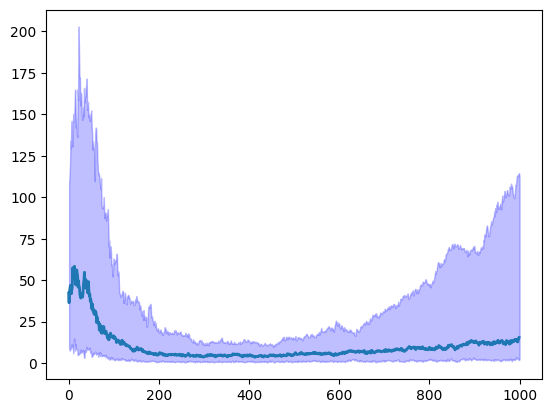

In [9]:
under_line = np.quantile(rmse_move_sfim,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
over_line = np.quantile(rmse_move_sfim,0.9,axis=0) #rmse.std(axis=0)*1.96

plt.plot(np.quantile(rmse_move_sfim,q=0.5,axis=0), linewidth=2) #mean curve.
plt.fill_between(k, under_line, over_line, color='b', alpha=.25) #std curves.

In [10]:
experiment_name = os.path.join("Experiment1_PFIM",f"N_radar={N_radar}-{move_radars[1]}")
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_move_pfim = get_rmse_array(filepath)
print(len(rmse_move_pfim))

114


In [11]:
experiment_name = os.path.join("Experiment1_SFIM_bad",f"N_radar={N_radar}-{move_radars[1]}")
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_move_sfim_bad = get_rmse_array(filepath)
print(len(rmse_move_sfim_bad))

116


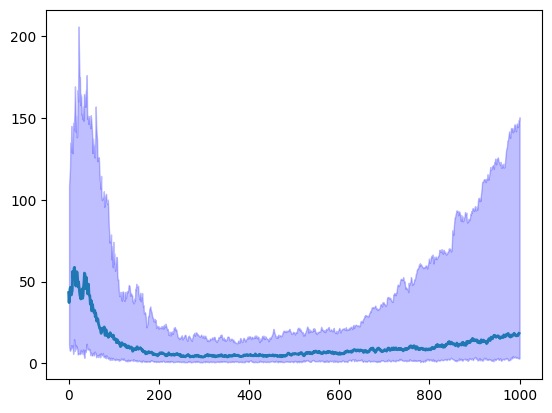

In [12]:
under_line = np.quantile(rmse_move_pfim,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
over_line = np.quantile(rmse_move_pfim,0.9,axis=0) #rmse.std(axis=0)*1.96

plt.plot(np.quantile(rmse_move_pfim,q=0.5,axis=0), linewidth=2) #mean curve.
plt.fill_between(k, under_line, over_line, color='b', alpha=.25) #std curves.

In [9]:
# under_line_move = np.quantile(rmse_move,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
# over_line_move = np.quantile(rmse_move,0.9,axis=0) #rmse.std(axis=0)*1.96

# plt.plot(np.quantile(rmse_move,q=0.5,axis=0), linewidth=2,label="SFIM Median") #mean curve.
# plt.fill_between(k, under_line_move, over_line_move, color='b', alpha=.25,label="SFIM Credible Interval") #std curves.

# under_line_nomove = np.quantile(rmse_move_pcrlb,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
# over_line_nomove = np.quantile(rmse_move_pcrlb,0.9,axis=0) #rmse.std(axis=0)*1.96

# plt.plot(np.quantile(rmse_move_pcrlb,q=0.5,axis=0), linewidth=2,label="PFIM Median") #mean curve.
# plt.fill_between(k, under_line_nomove, over_line_nomove, color='r', alpha=.25,label="PFIM Credible Interval") #std curves.
# plt.xlabel("Time Step")
# plt.ylabel("RMSE")
# plt.legend(loc="upper center")
# plt.savefig(os.path.join("results","N_radars=3,SFIMvsPCRLB.pdf"))

In [13]:
experiment_name = os.path.join("Experiment1_SFIM",f"N_radar={N_radar}-{move_radars[0]}")
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_nomove = get_rmse_array(filepath)
print(len(rmse_nomove))

ValueError: need at least one array to stack

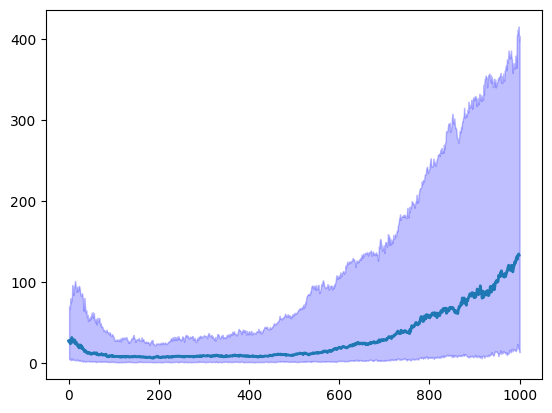

In [11]:
under_line = np.quantile(rmse_nomove,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
over_line = np.quantile(rmse_nomove,0.9,axis=0) #rmse.std(axis=0)*1.96

plt.plot(np.quantile(rmse_nomove,q=0.5,axis=0), linewidth=2) #mean curve.
plt.fill_between(k, under_line, over_line, color='b', alpha=.25) #std curves.

In [12]:
# under_line_move = np.quantile(rmse_move,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
# over_line_move = np.quantile(rmse_move,0.9,axis=0) #rmse.std(axis=0)*1.96

# plt.plot(np.quantile(rmse_move,q=0.5,axis=0), linewidth=2,label="Move Median") #mean curve.
# plt.fill_between(k, under_line_move, over_line_move, color='b', alpha=.25,label="Move Credible Interval") #std curves.

# under_line_nomove = np.quantile(rmse_nomove,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
# over_line_nomove = np.quantile(rmse_nomove,0.9,axis=0) #rmse.std(axis=0)*1.96

# plt.plot(np.quantile(rmse_nomove,q=0.5,axis=0), linewidth=2,label="No Move Median") #mean curve.
# plt.fill_between(k, under_line_nomove, over_line_nomove, color='r', alpha=.25,label="No Move Credible Interval") #std curves.
# plt.xlabel("Time Step")
# plt.ylabel("RMSE")
# plt.legend(loc="upper left")
# plt.savefig(os.path.join("results","N_radars=3,SFIM.pdf"))

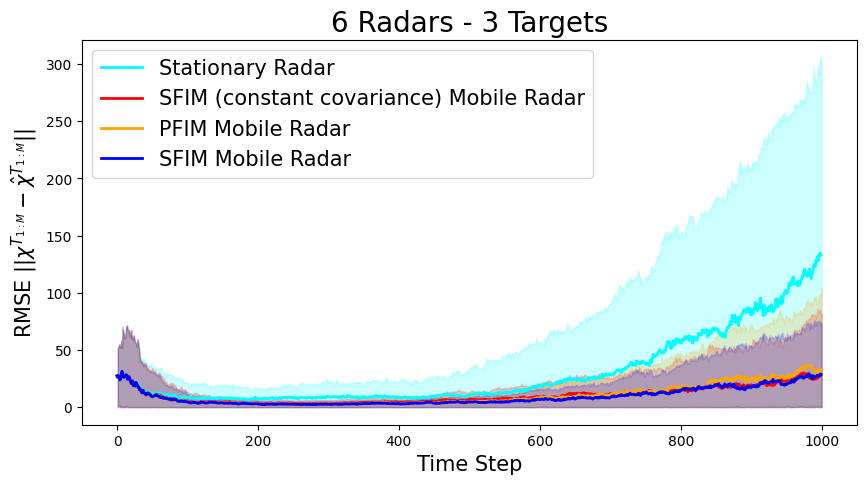

In [13]:
plt.figure(figsize=(10,5))
az.plot_hdi(k, np.expand_dims(rmse_nomove,axis=0),hdi_prob=0.8,smooth=False,color='cyan',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_nomove,q=0.5,axis=0), linewidth=2,color="cyan",label='Stationary Radar') #mean curve.
az.plot_hdi(k, np.expand_dims(rmse_move_sfim_bad,axis=0),hdi_prob=0.8,smooth=False,color='red',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_sfim_bad,q=0.5,axis=0), linewidth=2,color="red",label='SFIM (constant covariance) Mobile Radar') #mean curve.
az.plot_hdi(k, np.expand_dims(rmse_move_pfim,axis=0),hdi_prob=0.8,smooth=False,color='orange',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_pfim,q=0.5,axis=0), linewidth=2,color="orange",label='PFIM Mobile Radar') #mean curve.
az.plot_hdi(k, np.expand_dims(rmse_move_sfim,axis=0),hdi_prob=0.8,smooth=False,color='blue',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_sfim,q=0.5,axis=0), linewidth=2,color="blue",label='SFIM Mobile Radar') #mean curve.

plt.xlabel("Time Step",fontsize=15)
plt.ylabel('RMSE $\sqrt{|| \chi^{T_{1:M}} - \\hat{\chi}^{T_{1:M}} ||}$',fontsize=15)
# plt.ylabel("$x^2$")
plt.legend(loc="upper left",fontsize=15)
plt.title("6 Radars - 3 Targets",fontsize=20)
plt.savefig(os.path.join("results","rmse_overlayed2.pdf"))

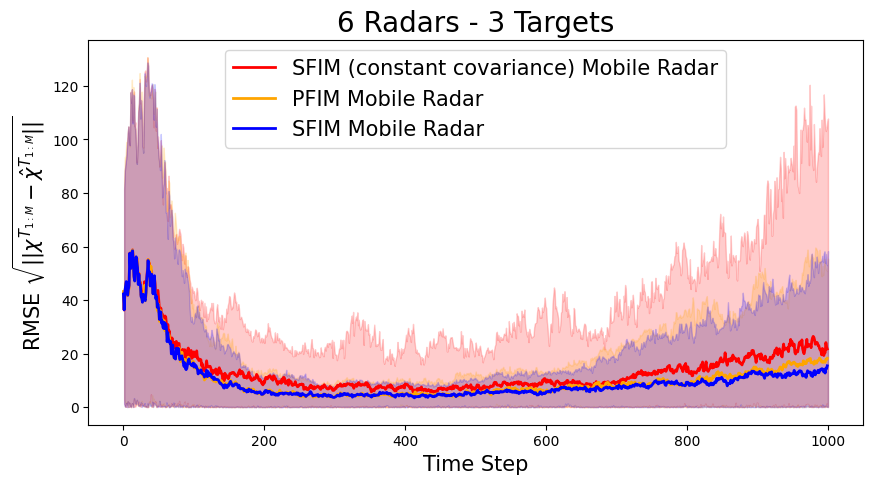

In [14]:
plt.figure(figsize=(10,5))
az.plot_hdi(k, np.expand_dims(rmse_move_sfim_bad,axis=0),hdi_prob=0.8,smooth=False,color='red',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_sfim_bad,q=0.5,axis=0), linewidth=2,color="red",label='SFIM (constant covariance) Mobile Radar') #mean curve.
az.plot_hdi(k, np.expand_dims(rmse_move_pfim,axis=0),hdi_prob=0.8,smooth=False,color='orange',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_pfim,q=0.5,axis=0), linewidth=2,color="orange",label='PFIM Mobile Radar') #mean curve.
az.plot_hdi(k, np.expand_dims(rmse_move_sfim,axis=0),hdi_prob=0.8,smooth=False,color='blue',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_sfim,q=0.5,axis=0), linewidth=2,color="blue",label='SFIM Mobile Radar') #mean curve.

plt.xlabel("Time Step",fontsize=15)
plt.ylabel('RMSE $\sqrt{|| \chi^{T_{1:M}} - \\hat{\chi}^{T_{1:M}} ||}$',fontsize=15)
# plt.ylabel("$x^2$")
plt.legend(loc="upper center",fontsize=15)
plt.title("6 Radars - 3 Targets",fontsize=20)
plt.savefig(os.path.join("results","rmse_overlayed_sfimbad2.pdf"))

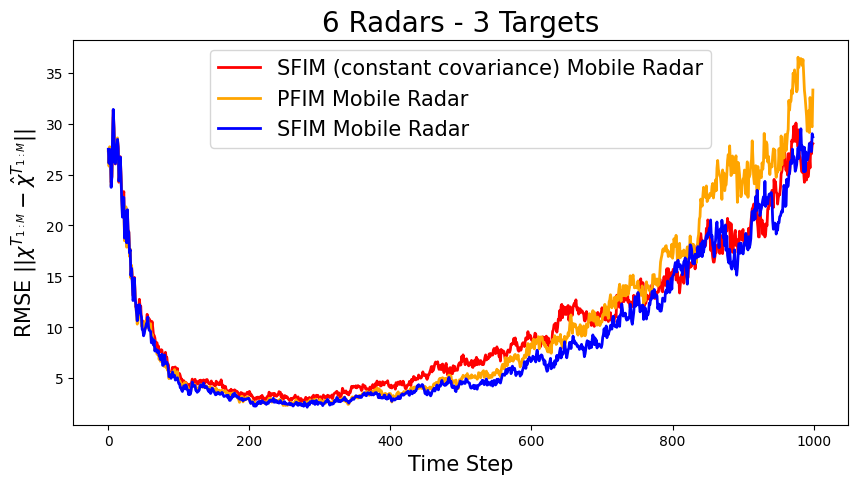

In [15]:
plt.figure(figsize=(10,5))
# az.plot_hdi(k, np.expand_dims(rmse_move_sfim_bad,axis=0),hdi_prob=0.8,smooth=False,color='red',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_sfim_bad,q=0.5,axis=0), linewidth=2,color="red",label='SFIM (constant covariance) Mobile Radar') #mean curve.
# az.plot_hdi(k, np.expand_dims(rmse_move_pfim,axis=0),hdi_prob=0.8,smooth=False,color='orange',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_pfim,q=0.5,axis=0), linewidth=2,color="orange",label='PFIM Mobile Radar') #mean curve.
# az.plot_hdi(k, np.expand_dims(rmse_move_sfim,axis=0),hdi_prob=0.8,smooth=False,color='blue',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_sfim,q=0.5,axis=0), linewidth=2,color="blue",label='SFIM Mobile Radar') #mean curve.

plt.xlabel("Time Step",fontsize=15)
plt.ylabel('RMSE $sqrt{|| \chi^{T_{1:M}} - \\hat{\chi}^{T_{1:M}} ||}$',fontsize=15)
# plt.ylabel("$x^2$")
plt.legend(loc="upper center",fontsize=15)
plt.title("6 Radars - 3 Targets",fontsize=20)
plt.savefig(os.path.join("results","rmse_overlayed_sfimbad_nohdi.pdf"))

In [16]:
np.median(rmse_move_pfim,axis=0).min()

2.344575625944998

In [17]:
np.median(rmse_move_sfim_bad,axis=0).min()

2.6560581405837214

In [18]:
rmse_move_sfim.max(axis=1).argmax()

16

In [19]:
np.median(rmse_move_sfim,axis=0).min()

2.1699725745322134

## Plot Overlapped Results

In [9]:
folder_path = r"/home/mlpotter/Documents/Northeastern/Research/OptimalTrackingAndControl/src_range_publish"
experiment_name = "test_SFIMbad_e1_123"
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_sfimbad = get_rmse_array(filepath)
print(len(rmse_sfimbad))

1


In [10]:
folder_path = r"/home/mlpotter/Documents/Northeastern/Research/OptimalTrackingAndControl/src_range_publish"
experiment_name = "test_SFIM_e1_123"
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_sfim = get_rmse_array(filepath)
print(len(rmse_sfim))

1


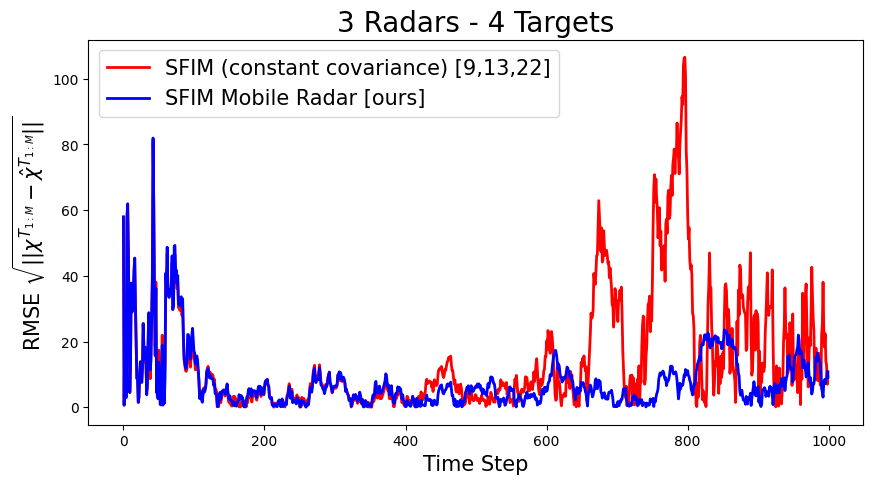

In [25]:
plt.figure(figsize=(10,5))

plt.plot(rmse_sfimbad.ravel(), linewidth=2,color="red",label='SFIM (constant covariance) [9,13,22]') #mean curve.
plt.plot(rmse_sfim.ravel(), linewidth=2,color="blue",label='SFIM Mobile Radar [ours]') #mean curve.

plt.xlabel("Time Step",fontsize=15)
plt.ylabel('RMSE $\sqrt{|| \chi^{T_{1:M}} - \\hat{\chi}^{T_{1:M}} ||}$',fontsize=15)
# plt.ylabel("$x^2$")
plt.legend(loc="upper left",fontsize=15)
plt.title("3 Radars - 4 Targets",fontsize=20)
plt.savefig(os.path.join("results","rmse_mse_realization1.pdf"))

In [26]:
folder_path = r"/home/mlpotter/Documents/Northeastern/Research/OptimalTrackingAndControl/src_range_publish"
experiment_name = "test_SFIMbad_e2_123"
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_sfimbad = get_rmse_array(filepath)
print(len(rmse_sfimbad))

1


In [ ]:
folder_path = r"/home/mlpotter/Documents/Northeastern/Research/OptimalTrackingAndControl/src_range_publish"
experiment_name = "test_SFIM_e2_123"
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_sfim = get_rmse_array(filepath)
print(len(rmse_sfim))

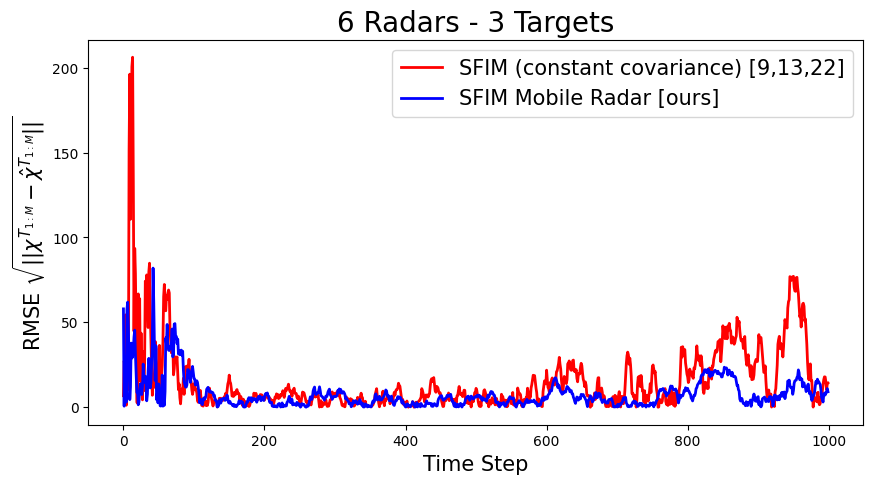

In [28]:
plt.figure(figsize=(10,5))

plt.plot(rmse_sfimbad.ravel(), linewidth=2,color="red",label='SFIM (constant covariance) [9,13,22]') #mean curve.
plt.plot(rmse_sfim.ravel(), linewidth=2,color="blue",label='SFIM Mobile Radar [ours]') #mean curve.

plt.xlabel("Time Step",fontsize=15)
plt.ylabel('RMSE $\sqrt{|| \chi^{T_{1:M}} - \\hat{\chi}^{T_{1:M}} ||}$',fontsize=15)
# plt.ylabel("$x^2$")
plt.legend(loc="upper right",fontsize=15)
plt.title("6 Radars - 3 Targets",fontsize=20)
plt.savefig(os.path.join("results","rmse_mse_realization2.pdf"))